### DS4420 Homework 2 - Gavin Wainwright

Question 1

In [169]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [11]:
x = np.array([1., 2., 1.5, 3.])
y = np.array([1., 1., 0., 2.])

In [12]:
def feature_map_quadratic(x):
    # phi_i = x**2, x, 1
    # 3 weights -- a, b, c
    return np.vstack([x**2, x, np.ones(len(x))]).T

def gradient_descent(X, y, learning_rate=0.01, iters=10000):
    # X is our feature map, y is our target labels
    m, n = X.shape
    # n weights
    w = np.zeros(n)

    for _ in range(iters):
        y_pred = X.dot(w)
        # find gradient
        gradient = X.T.dot(y_pred - y) / m
        # update weights
        w -= learning_rate * gradient
    return w


# Part 1 - Run gradient descent on quadratic
X = feature_map_quadratic(x)
print(f'X (feature map): \n {X}')
w = gradient_descent(X, y)
print(f'w: \n {w}')

X (feature map): 
 [[1.   1.   1.  ]
 [4.   2.   1.  ]
 [2.25 1.5  1.  ]
 [9.   3.   1.  ]]
w: 
 [ 0.46188384 -1.14896387  1.26946129]


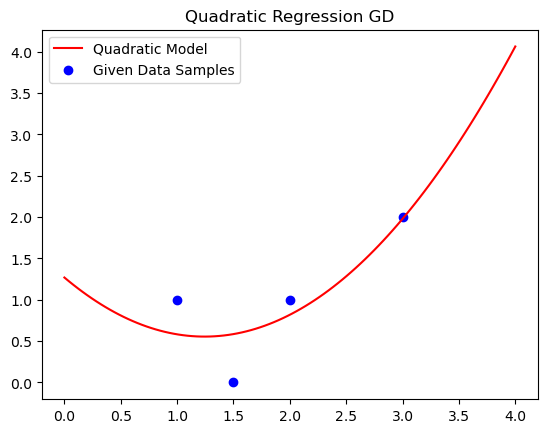

In [14]:
# Part 2 - Graph points and predicted model
x_space = np.linspace(0, 4, 100)
y_eq = x_space ** 2 * w[0] + x_space * w[1] + w[2]

plt.plot(x_space, y_eq, label='Quadratic Model', color='red')
plt.scatter(x, y, color='blue', label='Given Data Samples')
plt.title('Quadratic Regression GD')
plt.legend()
plt.show()

Question 2

In [15]:
# Part 1 - Use linear regression
x = genfromtxt('time_with_loved_ones.csv')
y = genfromtxt('happiness.csv')

In [17]:
def feature_map_linear(x):
    return np.vstack([x, np.ones(len(x))]).T

X = feature_map_linear(x)
print(f'X (feature map): \n {X}')
w = gradient_descent(X, y)
print(f'w: \n {w}')

X (feature map): 
 [[10.976  1.   ]
 [14.304  1.   ]
 [12.055  1.   ]
 ...
 [18.768  1.   ]
 [ 4.573  1.   ]
 [13.543  1.   ]]
w: 
 [0.39805737 0.33088431]


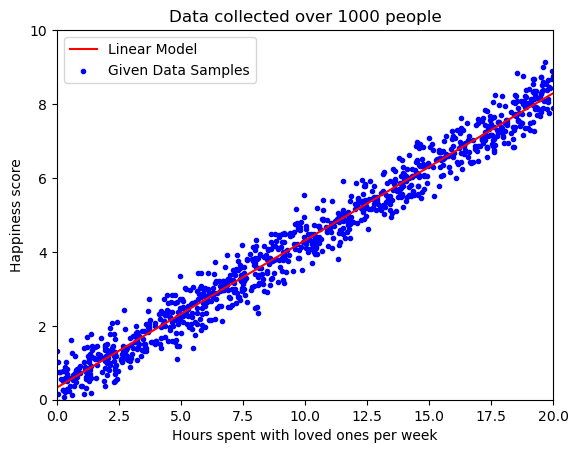

In [45]:
# Part 2 - Plot
x_space = np.linspace(0, 25, 1000)
y_eq = x_space * w[0] + w[1]

plt.plot(x_space, y_eq, label='Linear Model', color='red')
plt.scatter(x, y, color='blue', label='Given Data Samples', marker='.')
plt.axis([0.0, 20, 0.0, 10])
plt.title('Data collected over 1000 people')
plt.xlabel('Hours spent with loved ones per week')
plt.ylabel('Happiness score')
plt.legend()
plt.show()

In [48]:
# Part 3 - plug in value to predicted f(x)
def f(x):
    return x * w[0] + w[1]

print(f'if you spend 15 hours a week with your loved ones, how happy would you be?\n{f(15)}')

if you spend 15 hours a week with your loved ones, how happy would you be?
6.301744792557268


Question 3

In [127]:
X = genfromtxt('easier_data.csv', delimiter=',')
y = genfromtxt('label.csv')

In [128]:
# Part 1 - Pre-processing
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [139]:
# Part 2 - Regression
# solve w/ sklearn regression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
w = model.coef_

print(f'Predictions: {y_pred}\n')
print(f'Mean Squared Error: {mse}\n')
print(f'w: {w}')

Predictions: [  0.27320834   9.70146129 -10.75824044  -9.68704352   0.20632219
  -8.94386897   3.40174734   0.28660741   4.50264228  -1.80663245
 -10.03077766  -5.13729376  -0.72009951   8.30587136  -7.2579565
 -11.65872872  17.25606313  -2.65320754   3.43806978  -3.64623248
  -6.59213408  -3.56359904   4.48224692   8.79317382  13.19644815
  -4.35334608   6.36769504   7.12566428   2.59933571  -1.58793389
   7.67261771 -14.42467405  -3.78585901   7.47685091   4.69714377
  -3.02677705   5.05688624   8.85101233  -1.91000918   3.27948875
   4.86302636  11.92720072  -7.01720485  -9.26826211   6.55518811
  11.86793574   2.1352442   -2.10977191 -11.02783942  -8.09914071
  -9.49214456  -1.53902471  -2.26163446   4.30958326   4.08119936
  -5.45993557   7.42314873  12.7297123    1.71665002   2.59297134]

Mean Squared Error: 0.05394541021104959

w: 
 [-0.00875978  3.99702867  0.007349   -0.01071629  0.98801657  3.00145572
  3.98079131  2.97103278  0.97240642  1.0208697 ]


In [140]:
# solve w/ your own gradient descent
X = np.hstack((X, np.ones((len(X), 1))))
w = gradient_descent(X, y)
predictions = X @ w
mse = mean_squared_error(y, predictions)

print(f'Predictions: {predictions}\n')
print(f'Comparison: {(y - predictions)**2}\n')
print(f'Mean Squared Error: {mse}\n')
print(f'w: {w}')

Predictions: [-2.77741789e-01 -1.66321839e+01  1.44950277e+00  1.26109733e+01
  7.84474723e+00 -3.02758959e+00 -3.85142282e-01 -1.10136978e+01
 -4.25254287e+00  3.46078036e+00 -8.13121973e+00  1.79407423e-02
  2.16249341e+00 -7.01206305e+00  4.60592082e+00  1.79731019e+00
  3.78250201e+00  3.98687888e+00  6.57524977e+00 -7.09064329e+00
  3.29308838e+00  1.06886148e+01 -2.21381706e+00  6.35696584e+00
 -4.61816092e+00  2.01489581e-01  7.12585137e+00  6.62644056e+00
 -3.18777013e+00  5.05459400e+00 -1.09701920e+01 -4.27051112e+00
 -3.63608904e+00  5.87306622e+00  5.58074382e+00 -4.92674689e+00
 -3.63325478e+00 -8.93287526e+00  8.67543969e+00  4.94507940e+00
  6.50569547e+00  3.84906859e+00 -1.12230064e+00 -1.33104141e+01
 -1.16592536e+01  8.98364497e+00  4.54210657e+00  1.55009983e+01
 -6.23382676e+00 -3.33666917e+00 -6.95886347e+00  4.48019419e+00
  2.60586728e+00 -2.03532438e+00  7.47059408e+00 -5.64889611e-01
 -7.37206809e+00  1.12515754e+01  4.66433461e+00 -7.94649598e+00
  9.77100823

In [141]:
# solve w/ closed form solution
w = np.linalg.pinv(X.T @ X) @ X.T @ y
predictions = X @ w
mse = mean_squared_error(y, predictions)

print(f'Predictions: {predictions}\n')
print(f'Comparison: {(y - predictions)**2}\n')
print(f'Mean Squared Error: {mse}\n')
print(f'w: {w}')

Predictions: [-2.77741789e-01 -1.66321839e+01  1.44950277e+00  1.26109733e+01
  7.84474723e+00 -3.02758959e+00 -3.85142282e-01 -1.10136978e+01
 -4.25254287e+00  3.46078036e+00 -8.13121973e+00  1.79407423e-02
  2.16249341e+00 -7.01206305e+00  4.60592082e+00  1.79731019e+00
  3.78250201e+00  3.98687888e+00  6.57524977e+00 -7.09064329e+00
  3.29308838e+00  1.06886148e+01 -2.21381706e+00  6.35696584e+00
 -4.61816092e+00  2.01489581e-01  7.12585137e+00  6.62644056e+00
 -3.18777013e+00  5.05459400e+00 -1.09701920e+01 -4.27051112e+00
 -3.63608904e+00  5.87306622e+00  5.58074382e+00 -4.92674689e+00
 -3.63325478e+00 -8.93287526e+00  8.67543969e+00  4.94507940e+00
  6.50569547e+00  3.84906859e+00 -1.12230064e+00 -1.33104141e+01
 -1.16592536e+01  8.98364497e+00  4.54210657e+00  1.55009983e+01
 -6.23382676e+00 -3.33666917e+00 -6.95886347e+00  4.48019419e+00
  2.60586728e+00 -2.03532438e+00  7.47059408e+00 -5.64889611e-01
 -7.37206809e+00  1.12515754e+01  4.66433461e+00 -7.94649598e+00
  9.77100823

After comparing the predictions to the true labels, we can tell the predictions are very good considering how small the numbers are when subtracting y from y_pred

In [157]:
# reset our X values
X = genfromtxt('easier_data.csv', delimiter=',')
y = genfromtxt('label.csv')

X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [160]:
# Part 3 - Repeat with polynomial regression
# solve w/ sklearn regression

poly_features = PolynomialFeatures(2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
w = model.coef_

print(f'Predictions: {y_train_pred}\n')
print(f'Mean Squared Error (train): {train_mse}\n')
print(f'Mean Squared Error (test): {test_mse}\n')
print(f'w: {w}')

Predictions: [  0.16868329 -10.85961055   4.38828705  -1.44320917   7.78744855
   1.78038849  16.67400381   4.7478784   -9.0471516   11.13783791
  -4.40173928   4.62120813  12.66565429  -5.0488852   10.19049347
  -2.20129131  11.87315329   7.48785274   3.48992152  12.79404101
   1.3662034    6.20917509  14.71252569   4.83382029  -4.23611226
  -3.67778533   8.48972206   0.19655408  -3.17846966   4.03458518
   3.44468979   1.95413274  -6.2919013    5.62726825  -2.82017523
   0.26525695  -8.30625154  12.47687771  -7.37173736  -5.46150664
 -11.25405208   3.61235513   4.2179079   -8.02313735   1.9555527
   5.80653868  12.46487332   6.55898936  -1.30826814 -10.81822892
  -5.35624141  -3.10735596   8.73360964  -4.98915112  18.1627874
   2.2084169   -0.80978081   4.76024595  -2.77031075   1.34790681
   2.1338007   -7.99284302  -4.68413019   2.64330644  -2.54264057
  -5.06522316   6.61660141  -6.67649091  -7.37855908   1.28292476
  -1.90541036   3.80901341  -7.51276094   4.9950635   -3.18606889

In [142]:
# solve w/ your own gradient descent
X = np.hstack((X**2, X, np.ones((len(X), 1))))
w = gradient_descent(X, y)
predictions = X @ w
mse = mean_squared_error(y, predictions)

print(f'Predictions: {predictions}\n')
print(f'Comparison: {(y - predictions)**2}\n')
print(f'Mean Squared Error: {mse}\n')
print(f'w: {w}')

Predictions: [ -0.30305706 -16.67603694   1.41078775  12.59123102   7.80371779
  -3.01120106  -0.40051094 -11.02527354  -4.22801778   3.48522104
  -8.19653633   0.02197974   2.15458388  -7.0708288    4.63304497
   1.77008459   3.79856807   3.93612166   6.60265336  -7.09812253
   3.29052673  10.5806874   -2.19743933   6.29862458  -4.57707898
   0.22214523   7.17553287   6.64292282  -3.16428451   5.08211509
 -11.02104833  -4.29099172  -3.61311373   5.76645239   5.56197991
  -4.90005165  -3.65450196  -8.89018769   8.75096101   4.9729739
   6.50251274   3.81964944  -1.12772171 -13.33326171 -11.6669248
   8.96627747   4.49652869  15.49630148  -6.2479896   -3.31583081
  -6.8892903    4.44700005   2.6380814   -2.01196043   7.44596706
  -0.55422425  -7.37380553  11.24481847   4.61999061  -7.98364957
   9.8022739    1.22219306  11.10684832  -3.26436306   8.83824933
  -5.27644076  13.49543511   2.77458578   8.53739923  -2.74788232
   3.72359511  -1.89694187  16.63093212  -1.59233334  -9.28864929

In [143]:
# solve w/ closed form solution
w = np.linalg.pinv(X.T @ X) @ X.T @ y
predictions = X @ w
mse = mean_squared_error(y, predictions)

print(f'Predictions: {predictions}\n')
print(f'Comparison: {(y - predictions)**2}\n')
print(f'Mean Squared Error: {mse}\n')
print(f'w: {w}')

Predictions: [ -0.30325154 -16.67588872   1.41097905  12.59199325   7.80412714
  -3.01055206  -0.39971988 -11.02561835  -4.22723299   3.48595314
  -8.19677276   0.02281018   2.15472521  -7.07105624   4.63338547
   1.7692782    3.79924811   3.9359803    6.60193988  -7.09729294
   3.29086106  10.57996226  -2.19711234   6.29890071  -4.5757467
   0.22319462   7.17514814   6.64423308  -3.16446223   5.08189417
 -11.02138704  -4.29076369  -3.61368365   5.76635703   5.56072384
  -4.89992104  -3.65449356  -8.88961051   8.75035292   4.97302695
   6.50419701   3.81964831  -1.12734725 -13.33284427 -11.66655619
   8.9660128    4.49681899  15.49625609  -6.24776334  -3.31610078
  -6.88924444   4.44782858   2.63874052  -2.01244265   7.4456998
  -0.55316256  -7.37414586  11.24438334   4.62042677  -7.98334179
   9.80302674   1.22164713  11.10654755  -3.26402774   8.83846535
  -5.27685633  13.49553971   2.77444495   8.53789971  -2.74695887
   3.72357925  -1.89596267  16.63114437  -1.59271233  -9.28827062

After comparing the predictions to the true labels, we can tell the predictions are very good considering how small the numbers are when subtracting y from y_pred even when using the polynomial equation as compared to the linear equation

Question 4

In [170]:
x = np.array([0, 1, 2, 3])
y = np.array([1, 0, 2, -2])
X = np.vstack([np.ones(len(x)), x]).T

w = np.linalg.pinv(X.T @ X) @ X.T @ y
print(f'f(x) = {w[1]}x + {w[0]}')

f(x) = -0.7x + 1.3


Question 5

In [171]:
data = np.array([
    [0, 2],
    [2, -1],
    [-2, 1],
    [3, 3],
    [4, 1]
])

def transform(data):
    transformed = []
    for x1, x2 in data:
        transformed_point = [
            x1,           # φ1(x) = x1
            x2,           # φ2(x) = x2
            x1 * x2**2,   # φ3(x) = x1 * x2^2
            x1**3,        # φ4(x) = x1^3
            x2**2,        # φ5(x) = x2^2
            1             # φ6(x) = 1
        ]
        transformed.append(transformed_point)
    return np.array(transformed)

# apply the transformation
transformed_data = transform(data)
transformed_data

array([[ 0,  2,  0,  0,  4,  1],
       [ 2, -1,  2,  8,  1,  1],
       [-2,  1, -2, -8,  1,  1],
       [ 3,  3, 27, 27,  9,  1],
       [ 4,  1,  4, 64,  1,  1]])